# Kaggle 신용카드 부정결제 검출 
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [ ]:
# !wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-01-10 01:24:11--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   175MB/s    in 0.4s    

2023-01-10 01:24:16 (175 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [ ]:
# !ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Jan 10 01:24 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Jan  5 14:34 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [ ]:
# !unzip creditCardFraud.zip

Archive:  creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [ ]:
# !ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Jan 10 01:24 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Jan  5 14:34 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [2]:
# %%time

import pandas as pd

DF = pd.read_csv('../../../secret/homework_data/ML_credit_card/creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
DF.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


> ## 3) 'Time' -> 'hours'
* 'Time': 각 거래와 첫 번째 거래 사이에 경과된 초('Seconds') 

> ### (1) 시간('hours') 정보 생성

In [5]:
timedelta = pd.to_timedelta(DF['Time'], unit = 's') # 초기준으로 타임데이터 객체를 만들고 시간정수값을 출력할 수 있음

DF['Time'] = (timedelta.dt.components.hours).astype(int)

In [6]:
DF.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [7]:
DF.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,23,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,23,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


> ### (2) 시간별 거래량

In [8]:
DF['Time'].value_counts()

21    17703
18    17039
11    16856
20    16756
10    16598
14    16570
15    16461
16    16453
17    16166
9     15838
19    15649
22    15441
12    15420
13    15365
23    10938
8     10276
0      7695
7      7243
1      4220
6      4101
3      3492
2      3328
5      2990
4      2209
Name: Time, dtype: int64

> ### (3) 시간별 거래량 Visualization

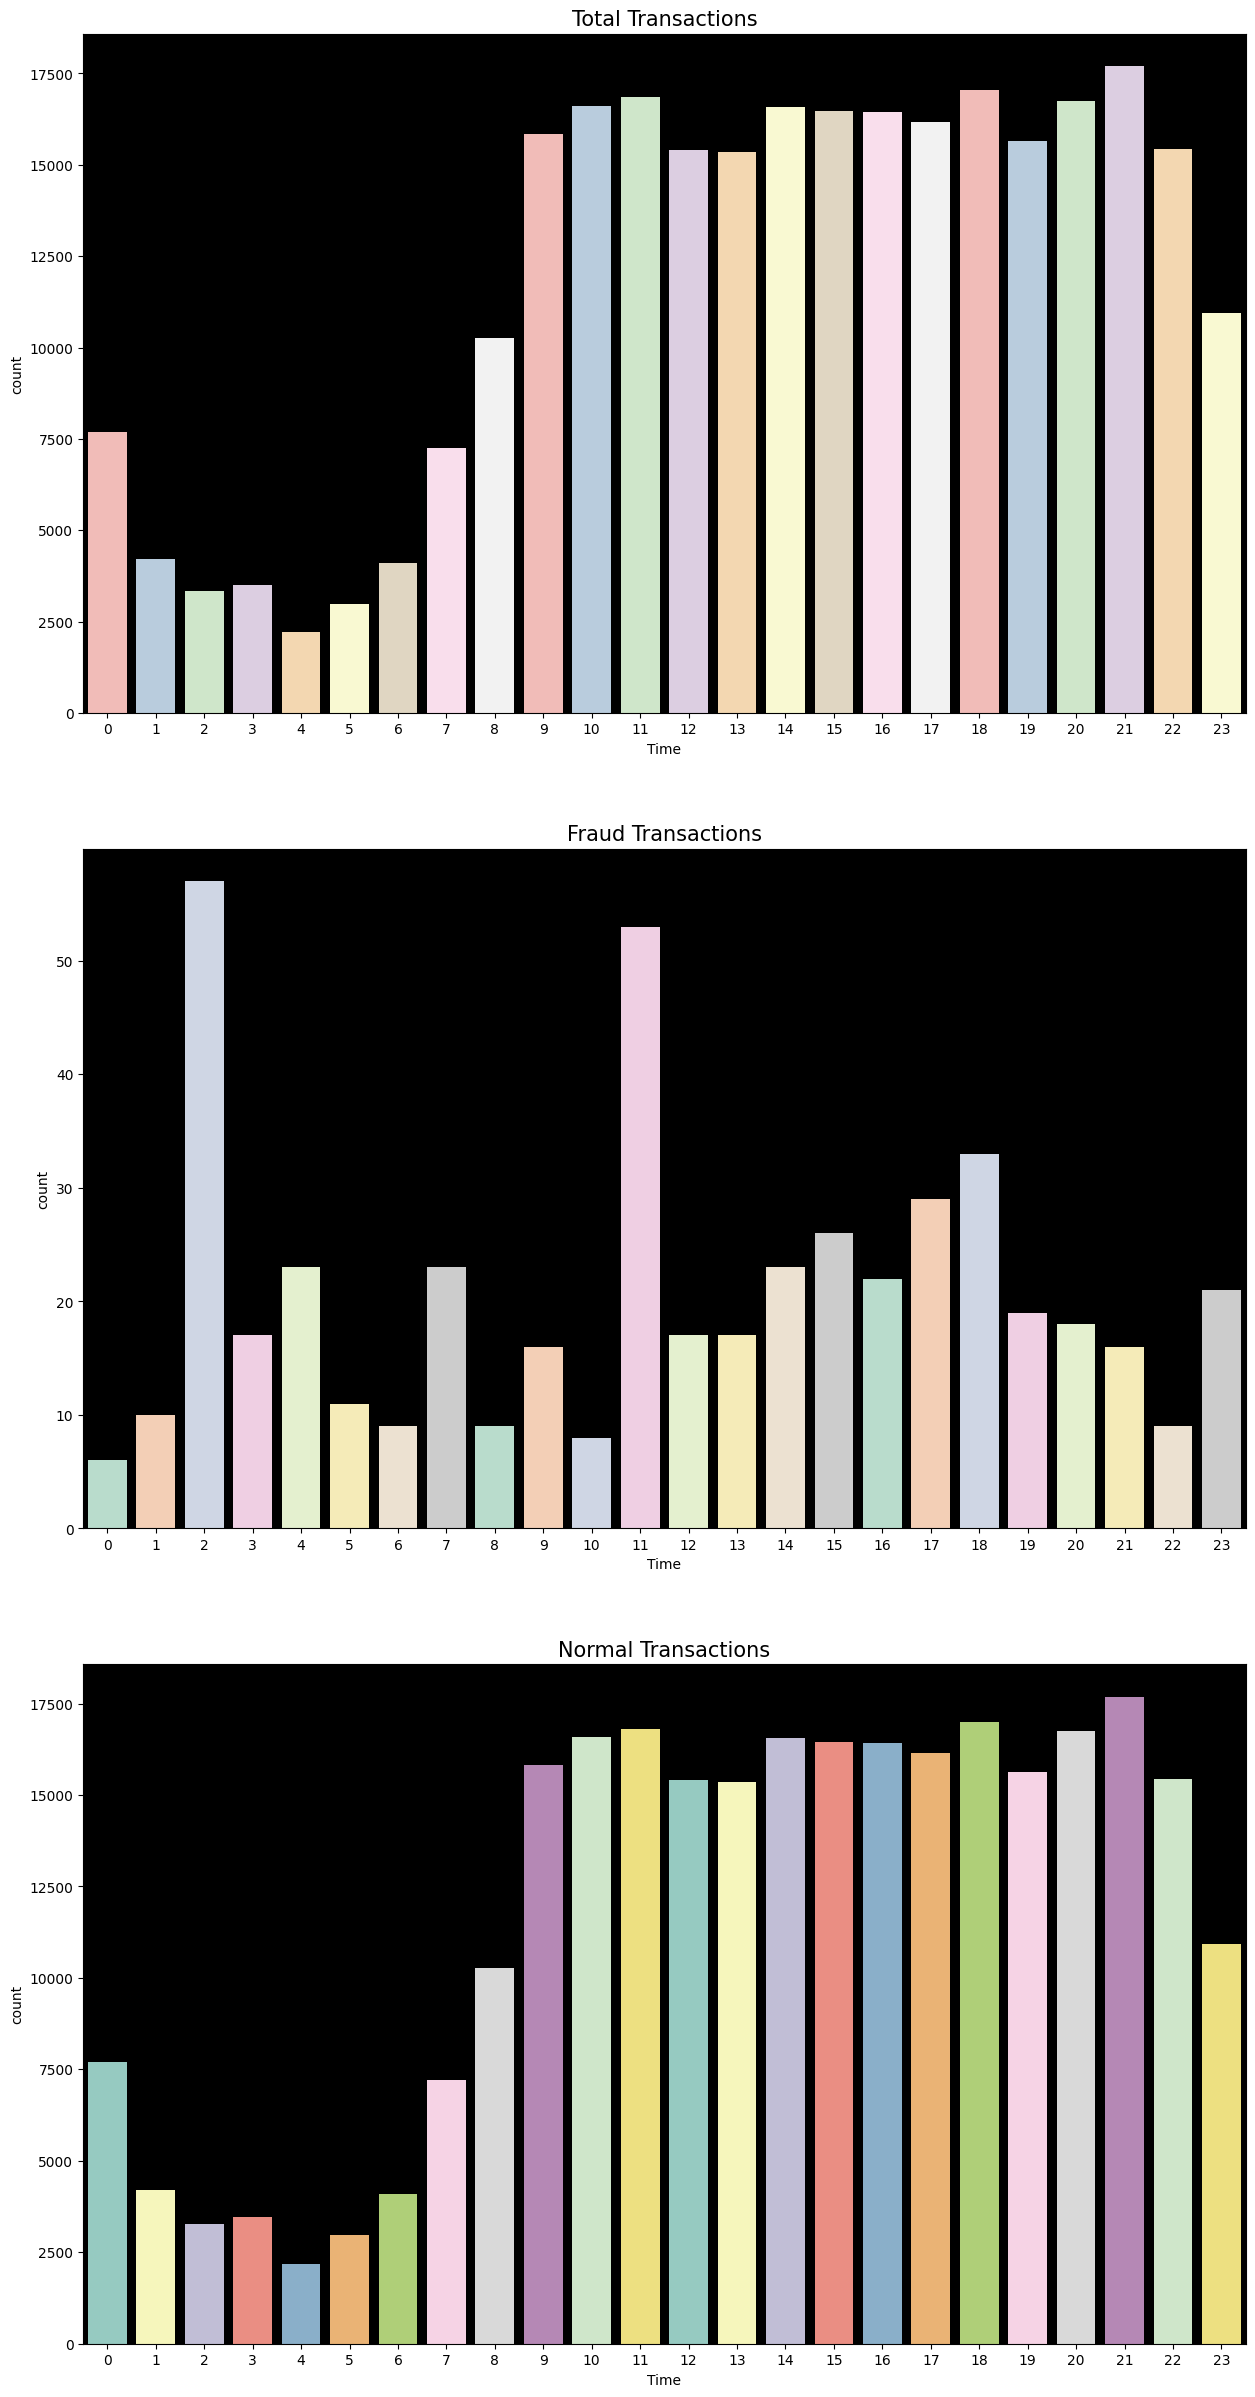

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, figsize = (15, 30))

sns.countplot(x = DF['Time'], 
              ax = axs[0], 
              palette = 'Pastel1')
axs[0].set_title('Total Transactions', 
                 fontsize = 15)
axs[0].set_facecolor("black")

sns.countplot(x = DF[(DF['Class'] == 1)]['Time'], 
              ax = axs[1], 
              palette = 'Pastel2')
axs[1].set_title('Fraud Transactions', 
                 fontsize = 15)
axs[1].set_facecolor('black')

sns.countplot(x = DF[(DF['Class'] == 0)]['Time'], 
              ax = axs[2], 
              palette = 'Set3')
axs[2].set_title('Normal Transactions', 
                 fontsize = 15)
axs[2].set_facecolor("black")

plt.show()

> ## 4) train_test_split( )

> ### (1) X (Input), y (Output) 지정

In [10]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 30), (284807,))

> ### (2) With 'stratify'

In [11]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [12]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# III. Modeling - Decison Tree

> ## 1) Without SMOTE

> ### (1) Model 학습

In [13]:
# %%time

from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2045)

> ### (2) 예측값 생성

In [14]:
y_hat = Model_dt.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  121,    27],
       [   34, 85261]], dtype=int64)

* Scores

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99968   0.99960   0.99964     85295
          부정    0.78065   0.81757   0.79868       148

    accuracy                        0.99929     85443
   macro avg    0.89016   0.90858   0.89916     85443
weighted avg    0.99930   0.99929   0.99929     85443



> ### (4) Feature Importance

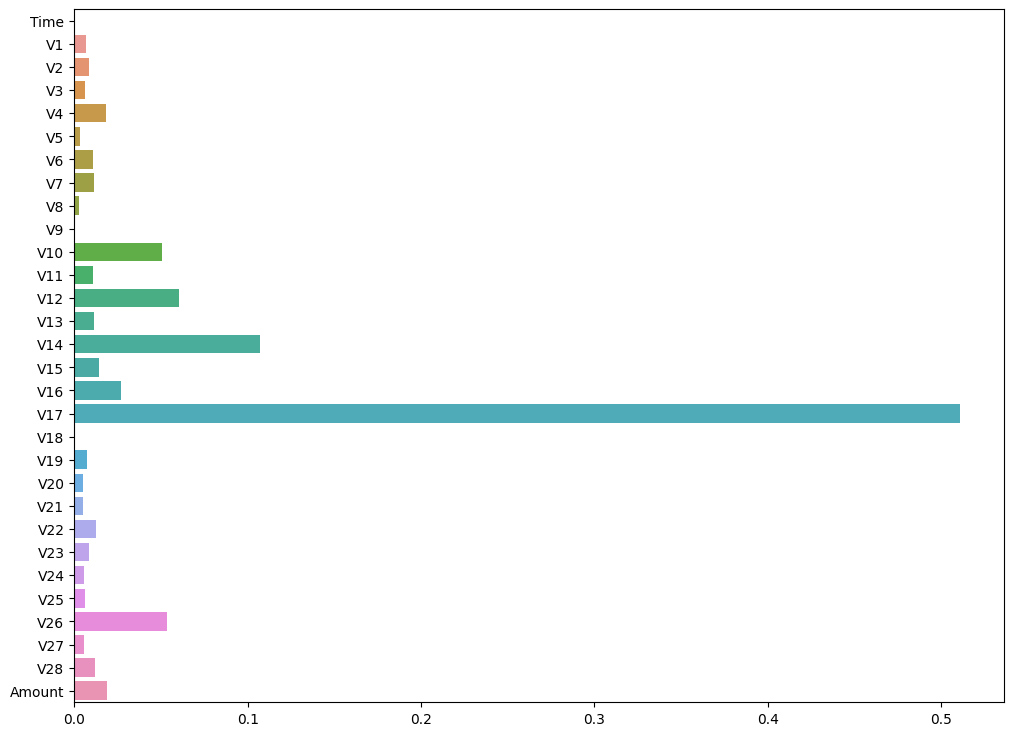

In [17]:
# v17이 너무 높다. 특정 변수가 결과에 너무 큰 영향을 주고 있으니 빼고 해보자.
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_dt.feature_importances_,
            y = X_train.columns)
plt.show()

> ## 2) SMOTE

* Synthetic Minority Over-sampling TEchnique
* KNN(K-Nearst Neighbor) : K개의 이웃과 일정 값의 차이를 가지를 새로운 데이터를 생성
- 오버샘플링은 훈련데이터에만 적용한다.
* imbalanced-learn Package

> ### > (1) Before SMORT

In [18]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [19]:
pd.Series(y_train).value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [20]:
X_train[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
175660,10,-2.353062,2.719667,-1.442479,-1.739477,0.933258,-1.805955,2.150139,-1.013120,2.343305,...,1.448128,-0.232574,0.714511,-0.198012,-0.029094,0.128996,0.046007,0.891105,0.344601,3.78
145331,0,-0.290290,0.411460,-0.406813,-0.471921,1.756346,-1.176621,0.715865,-0.171749,-0.244361,...,0.067899,-0.139295,-0.480183,0.287938,0.499635,-1.251272,-0.040220,0.190796,0.297079,1.98
179191,10,2.124485,-0.107674,-1.509747,0.178449,0.342655,-0.620870,0.159012,-0.260699,0.636639,...,-0.189612,-0.356052,-0.906764,0.208692,-1.007817,-0.167217,0.260335,-0.074221,-0.069843,7.44
199609,12,1.750849,-1.459983,-1.141481,-0.611125,-0.993234,-0.967576,-0.223093,-0.383936,-0.348905,...,0.463535,0.344616,0.601632,-0.052760,0.049971,-0.123602,-0.186215,-0.049955,-0.015918,237.28
220917,15,2.132471,0.157415,-2.493049,0.328990,0.878038,-1.304422,0.878626,-0.478040,-0.293090,...,-0.282945,0.283941,0.960182,-0.232440,-0.321288,0.684001,0.730081,-0.131570,-0.108989,0.00


> ### (2) imbalanced-learn Package

In [41]:
# !pip install -U imbalanced-learn

     ------------------------------------- 226.0/226.0 kB 13.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from imblearn.over_sampling import SMOTE, SMOTEN

> ### (3) After SMOTE

In [28]:
# %%time

OS1 = SMOTE(random_state = 2045)
X_train_OS1, y_train_OS1 = OS1.fit_resample(X_train, y_train)

#categorical_features  범주형데이터 피처 인덱스
OS2= SMOTEN(random_state=2045)
X_train_OS2, y_train_OS2 = OS2.fit_resample(X_train, y_train)


In [29]:
print(X_train_OS1.shape, y_train_OS1.shape)
print(X_train_OS2.shape, y_train_OS2.shape)

(398040, 30) (398040,)
(398040, 30) (398040,)


* 0 (정상) Class와 1 (사기) Class 개수

In [31]:
pd.Series(y_train_OS1).value_counts()
# pd.Series(y_train_OS2).value_counts()

0    199020
1    199020
Name: Class, dtype: int64

> ## 3) With SMOTE & SMOTEN
https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html

> ### (1) Model 학습

In [32]:
# %%time 
from datetime import datetime
start_time = datetime.now()

from sklearn.tree import DecisionTreeClassifier

Model_dt1 = DecisionTreeClassifier(random_state = 2045)

Model_dt1.fit(X_train_OS1, y_train_OS1)

end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Elapsed Time :  0:00:17.914634


In [33]:
# %%time 
start_time = datetime.now()

Model_dt2 = DecisionTreeClassifier(random_state = 2045)

Model_dt2.fit(X_train_OS2, y_train_OS2)

end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Elapsed Time :  0:00:10.434190


> ### (2) 예측값 생성

In [35]:
y_hat1 = Model_dt1.predict(X_test)
y_hat2 = Model_dt2.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_hat1, labels = [1, 0]))
print(confusion_matrix(y_test, y_hat2, labels = [1, 0]))

[[  123    25]
 [  174 85121]]
[[  119    29]
 [   36 85259]]


* Scores

In [39]:
# recall은 소폭 상승했으나 precision이 급락함, 실패
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat1, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))
print(classification_report(y_test, y_hat2, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

              precision    recall  f1-score   support

         0정상    0.99971   0.99796   0.99883     85295
         1부정    0.41414   0.83108   0.55281       148

    accuracy                        0.99767     85443
   macro avg    0.70692   0.91452   0.77582     85443
weighted avg    0.99869   0.99767   0.99806     85443

              precision    recall  f1-score   support

         0정상    0.99966   0.99958   0.99962     85295
         1부정    0.76774   0.80405   0.78548       148

    accuracy                        0.99924     85443
   macro avg    0.88370   0.90182   0.89255     85443
weighted avg    0.99926   0.99924   0.99925     85443



> ### (4) Feature Importance

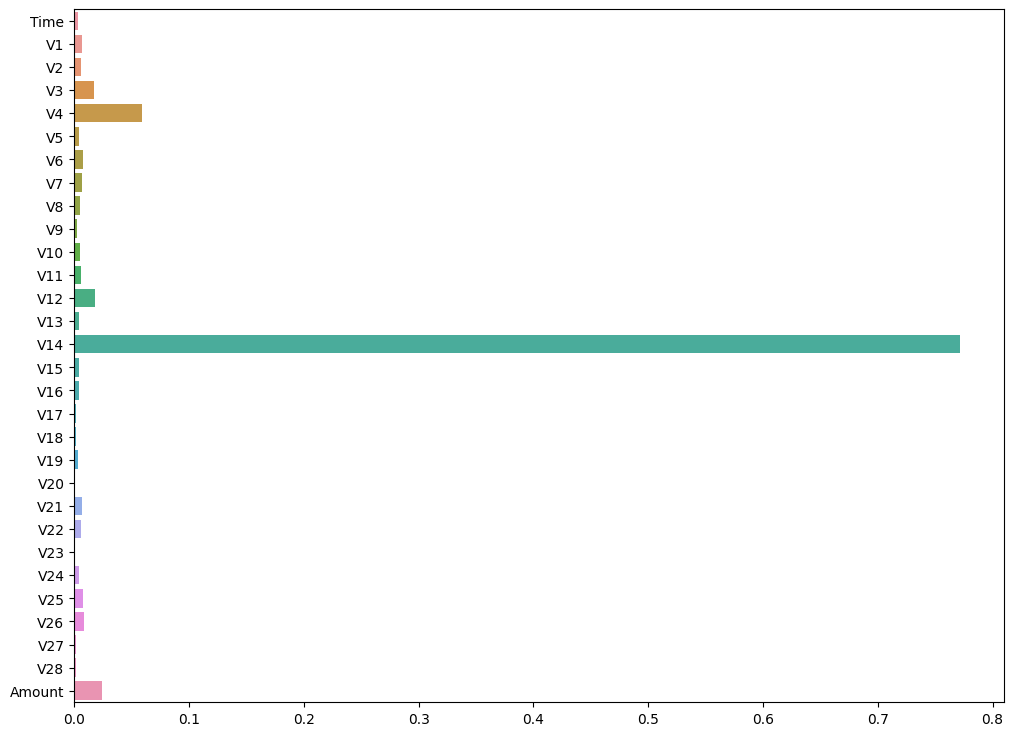

In [41]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_dt1.feature_importances_,
            y = X_train.columns)
plt.show()

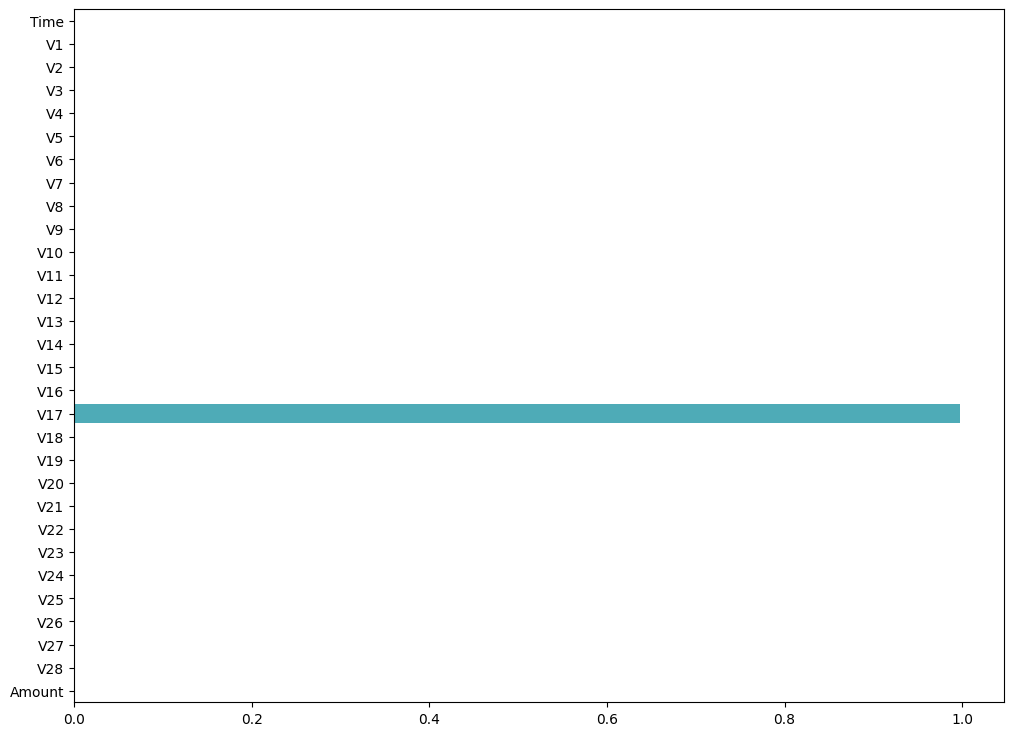

In [42]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_dt2.feature_importances_,
            y = X_train.columns)
plt.show()

# IV. Modeling - 추가

## oversampling + gridsearch + RF

### imbalance

In [86]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(verbose=10)

In [87]:
params = {'n_estimators':[50, 100, 500],
          'max_features':[2, 5, 10],
          'max_depth':[5, 10, 20],
          'min_samples_split': [2, 5, 10], 
          # 노드를 분할하기위한 최소한의 샘플 데이터수, 과적합 제어에 사용,
          # 작게 사용할 수록 분할 노드가 많아져 과적합 가능성 증가
          
          'random_state':[2045]}

In [88]:
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(Model_rf,
                       param_grid = params,
                       scoring = 'recall',
                       cv = KFold(n_splits = 5),
                       refit = True, # 최적 파라미터 모델 저장  model.best_estimator_
                    #   verbose = 10,
                       n_jobs = -1)

In [ ]:
start_time = datetime.now()

grid_cv.fit(X_train, y_train) 


end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
grid_cv.best_score_ 

In [ ]:
grid_cv.best_params_

In [ ]:
Model_CV = grid_cv.best_estimator_ 
y_hat = Model_CV.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

### SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(verbose=10)

In [ ]:
params = {'n_estimators':[50, 100, 500],
          'max_features':[2, 5, 10],
          'max_depth':[5, 10, 20],
          'min_samples_split': [2, 5, 10], 
          # 노드를 분할하기위한 최소한의 샘플 데이터수, 과적합 제어에 사용,
          # 작게 사용할 수록 분할 노드가 많아져 과적합 가능성 증가
          
          'random_state':[2045]}

In [ ]:
grid_cv = GridSearchCV(Model_rf,
                       param_grid = params,
                       scoring = 'recall',
                       cv = KFold(n_splits = 5),
                       refit = True, # 최적 파라미터 모델 저장  model.best_estimator_
                       n_jobs = -1)

In [ ]:
start_time = datetime.now()

with parallel('threads'):
    grid_cv.fit(X_train, y_train) 


end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

In [59]:
print(grid_cv.best_score_ )
print(grid_cv.best_params_)

0.9815219575922018
{'max_depth': 10, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 2045}


In [60]:
Model_CV_OS1 = grid_cv.best_estimator_ 
y_hat_OS1 = Model_CV_OS1.predict(X_test)

In [61]:
print(confusion_matrix(y_test, y_hat_OS1))
print(classification_report(y_test, y_hat_OS1, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

[[85154   141]
 [   16   132]]
              precision    recall  f1-score   support

         0정상    0.99981   0.99835   0.99908     85295
         1부정    0.48352   0.89189   0.62708       148

    accuracy                        0.99816     85443
   macro avg    0.74166   0.94512   0.81308     85443
weighted avg    0.99892   0.99816   0.99843     85443



### SMOTEN

In [63]:
start_time = datetime.now()
print(start_time)

grid_cv.fit(X_train_OS2, y_train_OS2) 

end_time = datetime.now()
print(end_time)
print('Elapsed Time : ', end_time - start_time)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Elapsed Time :  0:07:05.500588


In [64]:
print(grid_cv.best_score_ )
print(grid_cv.best_params_)

0.9997437443473018
{'max_depth': 10, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 2045}


In [65]:
Model_CV_OS2 = grid_cv.best_estimator_ 
y_hat_OS2 = Model_CV_OS2.predict(X_test)

In [66]:
print(confusion_matrix(y_test, y_hat_OS2))
print(classification_report(y_test, y_hat_OS2, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

[[85282    13]
 [   31   117]]
              precision    recall  f1-score   support

         0정상    0.99964   0.99985   0.99974     85295
         1부정    0.90000   0.79054   0.84173       148

    accuracy                        0.99949     85443
   macro avg    0.94982   0.89519   0.92073     85443
weighted avg    0.99946   0.99949   0.99947     85443



## oversampling + LGBM

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
# !pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 67.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
import matplotlib.pyplot as plt

### imbalance

In [72]:
# train
lgbm = LGBMClassifier(n_estimators = 400, learning_rate = 0.3, max_depth = 3)
lgbm.fit(X_train, y_train)

# prediction
y_hat = lgbm.predict(X_test)
y_hat_proba = lgbm.predict_proba(X_test)[:,1]

In [73]:
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

[[85111   184]
 [   71    77]]
              precision    recall  f1-score   support

         0정상    0.99917   0.99784   0.99850     85295
         1부정    0.29502   0.52027   0.37653       148

    accuracy                        0.99702     85443
   macro avg    0.64709   0.75906   0.68752     85443
weighted avg    0.99795   0.99702   0.99743     85443



### SMOTE

In [75]:
lgbm.fit(X_train_OS1, y_train_OS1)
y_hat = lgbm.predict(X_test)
y_hat_proba = lgbm.predict_proba(X_test)[:,1]

In [76]:
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

[[85251    44]
 [   18   130]]
              precision    recall  f1-score   support

         0정상    0.99979   0.99948   0.99964     85295
         1부정    0.74713   0.87838   0.80745       148

    accuracy                        0.99927     85443
   macro avg    0.87346   0.93893   0.90354     85443
weighted avg    0.99935   0.99927   0.99930     85443



### SMOTEN

In [77]:
lgbm.fit(X_train_OS2, y_train_OS2)
y_hat = lgbm.predict(X_test)
y_hat_proba = lgbm.predict_proba(X_test)[:,1]

In [78]:
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

[[84978   317]
 [   74    74]]
              precision    recall  f1-score   support

         0정상    0.99913   0.99628   0.99770     85295
         1부정    0.18926   0.50000   0.27458       148

    accuracy                        0.99542     85443
   macro avg    0.59419   0.74814   0.63614     85443
weighted avg    0.99773   0.99542   0.99645     85443



## SMOTE + gridsearch + LGBM

In [79]:
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(lgbm,
                       param_grid = params,
                       scoring = 'recall',
                       cv = KFold(n_splits = 5),
                       refit = True, # 최적 파라미터 모델 저장  model.best_estimator_
                       verbose = 10,
                       n_jobs = -1)

In [80]:
start_time = datetime.now()
print(start_time)

grid_cv.fit(X_train_OS1, y_train_OS1) 

end_time = datetime.now()
print(end_time)
print('Elapsed Time : ', end_time - start_time)

2023-01-10 15:14:36.291743
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
2023-01-10 15:15:23.046758
Elapsed Time :  0:00:46.755015


In [81]:
print(grid_cv.best_score_ )
print(grid_cv.best_params_)

0.9982539443272034
{'max_depth': 5, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 2045}


In [82]:
Model_CV = grid_cv.best_estimator_ 
y_hat = Model_CV.predict(X_test)

In [83]:
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

[[85149   146]
 [   16   132]]
              precision    recall  f1-score   support

         0정상    0.99981   0.99829   0.99905     85295
         1부정    0.47482   0.89189   0.61972       148

    accuracy                        0.99810     85443
   macro avg    0.73732   0.94509   0.80938     85443
weighted avg    0.99890   0.99810   0.99839     85443



# 
# 
# 
# The End
# 
# 
# 